In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib ipympl

# Reading the data

In [4]:
with open("Admission_Predict_Ver1.1.csv", "r") as file:
    lines = file.readlines()
    
SNo = []    
GRE = []
TOEFL = []
Uni_Rating = []
SOP = []
LOR = []
CG = []
Research = []
Chance = []

for line in lines[1:]:
    values = line.strip().split(",")
    SNo.append(float(values[0]))
    GRE.append(float(values[1]))
    TOEFL.append(float(values[2]))
    Uni_Rating.append(float(values[3]))
    SOP.append(float(values[4]))
    LOR.append(float(values[5]))
    CG.append(float(values[6]))
    Research.append(float(values[7]))
    Chance.append(float(values[8]))
    
SNo = np.array(SNo)
GRE = np.array(GRE)
TOEFL = np.array(TOEFL)
Uni_Rating = np.array(Uni_Rating)
SOP = np.array(SOP)
LOR = np.array(LOR)
CG = np.array(CG)
Research = np.array(Research)
Chance = np.array(Chance)

# Normalizing the data

In [5]:
def normalizer(factor):
    m = max(factor)
    for i in range(len(factor)):
        factor[i] /= m
        
    return factor

In [6]:
GRE = normalizer(GRE)
TOEFL = normalizer(TOEFL)
Uni_Rating = normalizer(Uni_Rating)
SOP = normalizer(SOP)
LOR = normalizer(LOR)
CG = normalizer(CG)
Research = normalizer(Research)
Chance = normalizer(Chance)

# Factors that affect Chance of getting into a Prestigious University

## Factor 1: GRE Score

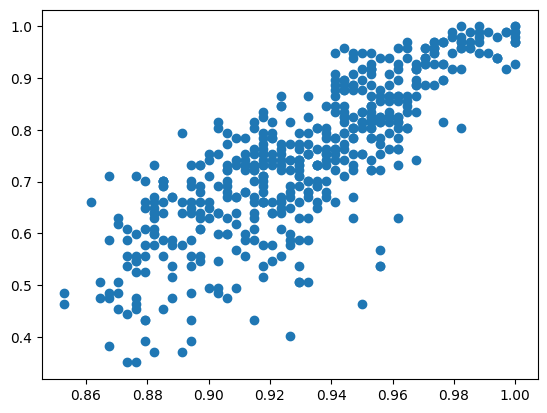

In [8]:
plt.scatter(GRE, Chance)

## Factor 2: TOEFL Score

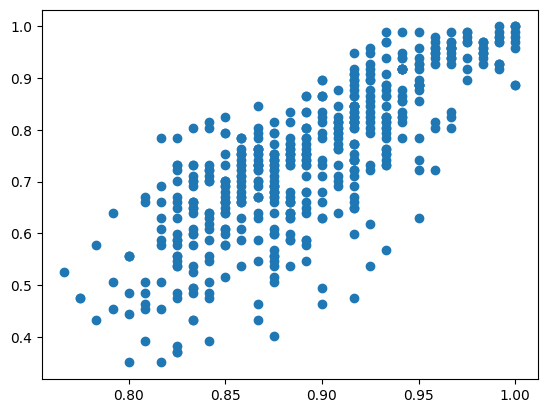

In [9]:
plt.scatter(TOEFL, Chance)

## Factor 3: University Rating

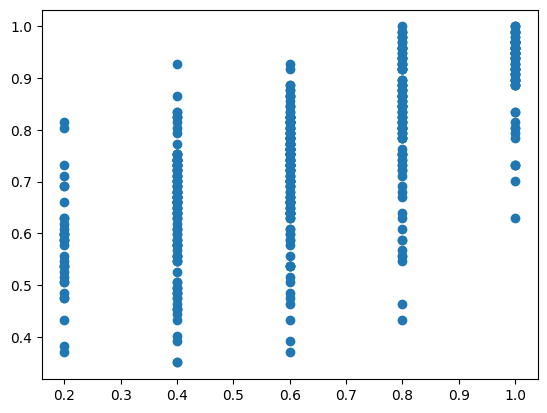

In [11]:
plt.scatter(Uni_Rating, Chance)

## Factor 4: SOP

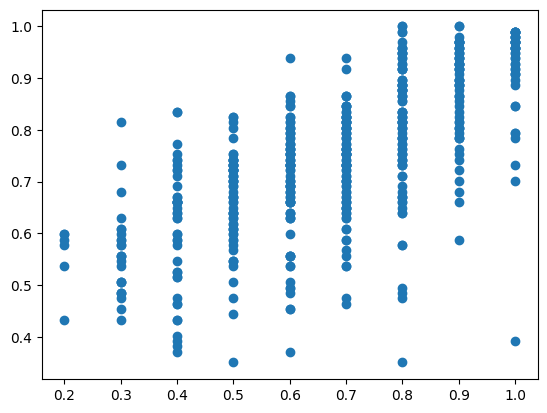

In [13]:
plt.scatter(SOP, Chance)

## Factor 5: LOR

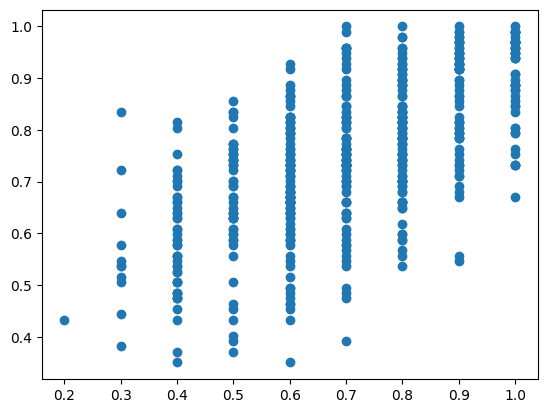

In [15]:
plt.scatter(LOR, Chance)

## Factor 6: CGPA

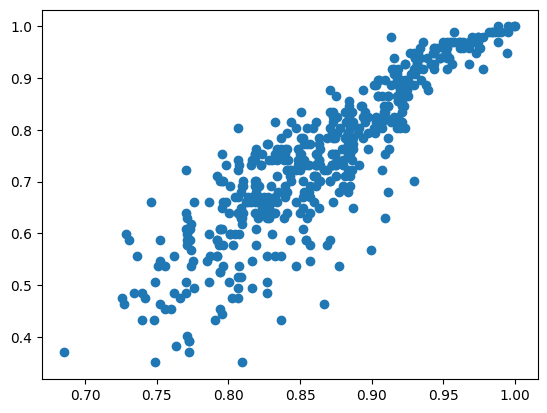

In [16]:
plt.scatter(CG, Chance)

## Factor 7: Research

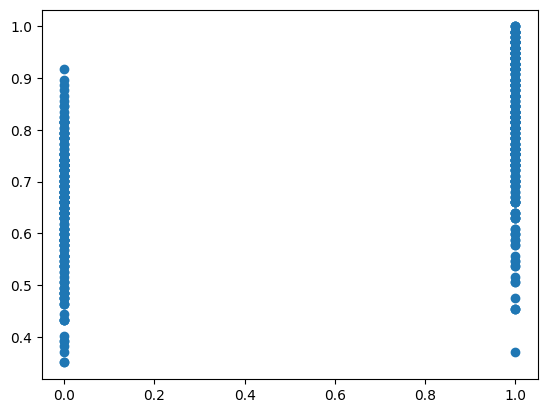

In [17]:
plt.scatter(Research, Chance)

# Linear Regression (Least Squares)

In [76]:
# Creating a matrix
X = np.vstack((GRE, TOEFL, Uni_Rating, SOP, LOR, CG, Research, np.ones(len(GRE)))).T 

# Performing linear regression
(a, b, c, d, e, f, g, constant), _, _, _ = np.linalg.lstsq(X, Chance, rcond=None)
              
# Calculating the chance of admit
predicted = (a * GRE + b * TOEFL + c * Uni_Rating + d * SOP + e * LOR + f * CG + g * Research + constant)

## Predicted Value vs Original Value

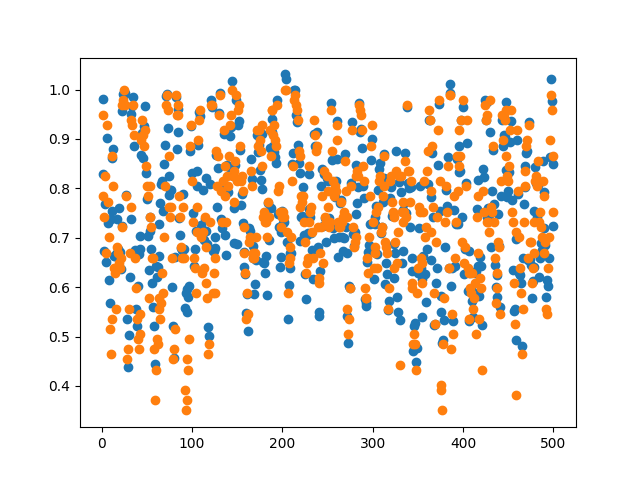

In [74]:
plt.cla()
plt.scatter(SNo, predicted, label="Predicted")
plt.scatter(SNo, Chance, label="Original")
plt.show()
plt.legend()
plt.savefig("Predicted_vs_Original")

# Important Features

In [77]:
print("GRE Score ->", a) 
print("TOEFL Score ->", b) 
print("University Rating->", c) 
print("SOP ->", d) 
print("LOR ->", e) 
print("CGPA ->", f) 
print("Research ->", g) 

GRE Score -> 0.6514352627870813
TOEFL Score -> 0.34366668759829977
University Rating-> 0.030625608454519615
SOP -> 0.008175966266838253
LOR -> 0.0869007337753541
CGPA -> 1.210700752887382
Research -> 0.02505925627027436


Clearly showing that the most important factors are CGPA, GRE Score and TOEFL Score.

# Top Institutes

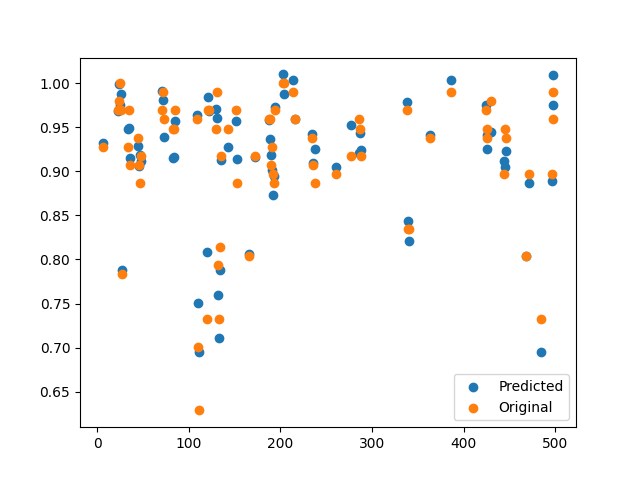

GRE Score -> 0.37244023565977985
TOEFL Score -> 0.45499974342140276
SOP -> 0.1493420266293729
LOR -> 0.020372564286421257
CGPA -> 0.7178265967202541
Research -> 0.07586906718750441


In [83]:
with open("Admission_Predict_Ver1.1.csv", "r") as file:
    lines = file.readlines()
    
s = []    
g = []
t = []
ur = []
sop = []
lor = []
cg = []
res = []
cha = []

for line in lines[1:]:
    values = line.strip().split(",")
    if values[3]=="5":
        s.append(float(values[0]))
        g.append(float(values[1]))
        t.append(float(values[2]))
        sop.append(float(values[4]))
        lor.append(float(values[5]))
        cg.append(float(values[6]))
        res.append(float(values[7]))
        cha.append(float(values[8]))
    
s = np.array(s)
g = np.array(g)
t = np.array(t)
sop = np.array(sop)
lor = np.array(lor)
cg = np.array(cg)
res = np.array(res)
cha = np.array(cha)

g = normalizer(g)
t = normalizer(t)
sop = normalizer(sop)
lor = normalizer(lor)
cg = normalizer(cg)
res = normalizer(res)
cha = normalizer(cha)

# Creating a matrix
X = np.vstack((g, t, sop, lor, cg, res, np.ones(len(g)))).T 

# Performing linear regression
(a, b, c, d, e, f, constant), _, _, _ = np.linalg.lstsq(X, cha, rcond=None)
              
# Calculating the chance of admit
pcha = (a * g + b * t + c * sop + d * lor + e * cg + f * res + constant)
plt.cla()
plt.scatter(s, pcha, label="Predicted")
plt.scatter(s, cha, label="Original")
plt.legend()
plt.show()
plt.savefig("fig2")

print("GRE Score ->", a) 
print("TOEFL Score ->", b) 
print("SOP ->", c) 
print("LOR ->", d) 
print("CGPA ->", e) 
print("Research ->", f) 

A similar pattern is seen for top-ranked institutes too. 